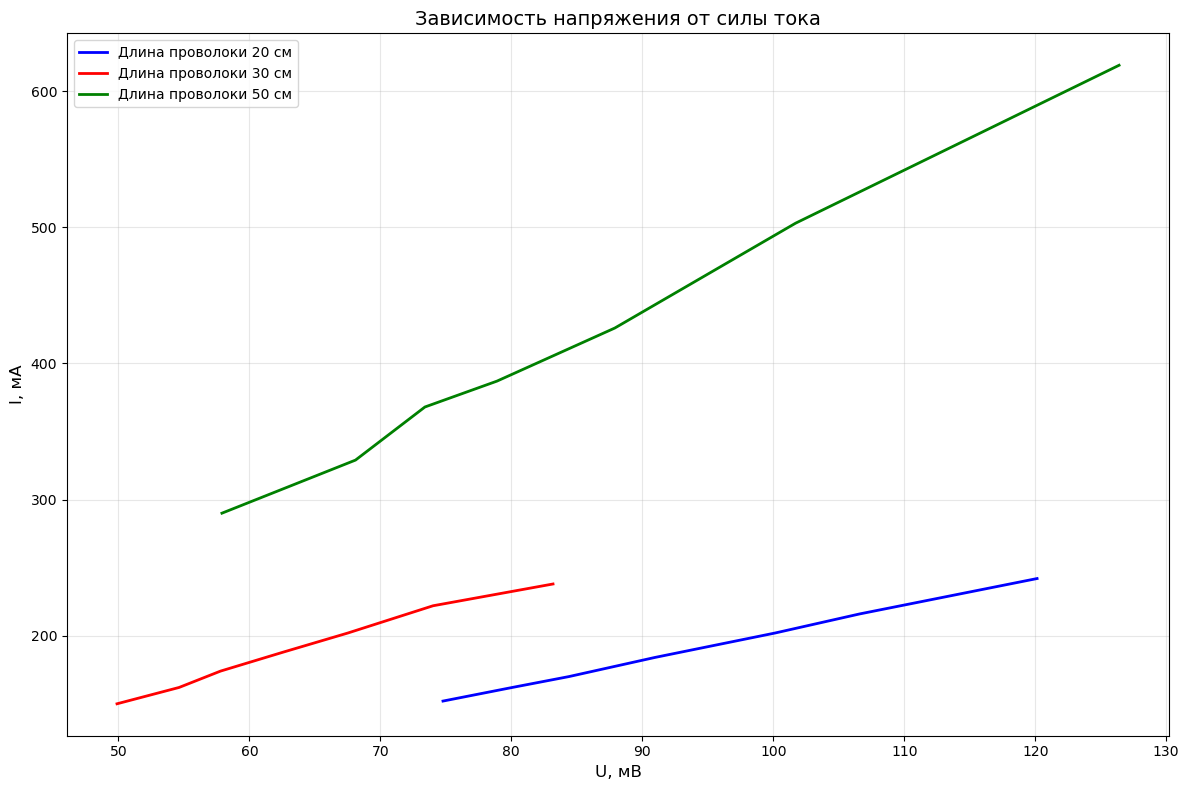

In [7]:
#Задание №1
import matplotlib.pyplot as plt
import numpy as np

x_line1 = np.array([74.78, 80.07, 84.40, 90.94, 100.14, 106.59, 120.14])
y_line1 = np.array([152, 162, 170, 184, 202, 216, 242])

x_line2 = np.array([49.89, 54.63, 57.79, 62.60, 67.52, 74.02, 83.18])
y_line2 = np.array([150, 162, 174, 188, 202, 222, 238])

x_line3 = np.array([57.9, 68.1, 73.4, 78.9, 87.9, 101.7, 126.4])
y_line3 = np.array([290, 329, 368, 387, 426, 503, 619])

x_points1 = np.array([108.43, 94.71, 88.50, 81.00, 73.79, 68.86, 65.99])
y_points1 = np.array([220, 192, 178, 164, 148, 140, 134])

x_points2 = np.array([79.17, 74.79, 70.25, 66.17, 62.58, 59.34, 54.62])
y_points2 = np.array([238, 224, 210, 198, 188, 178, 164])

x_points3 = np.array([68.89, 66.21, 63.64, 60.37, 57.32, 54.59, 51.34])
y_points3 = np.array([204, 196, 190, 180, 170, 162, 152])


plt.figure(figsize=(12, 8))

plt.plot(x_line1, y_line1, 'b-', linewidth=2, label='Длина проволоки 20 см')
plt.plot(x_line2, y_line2, 'r-', linewidth=2, label='Длина проволоки 30 см') 
plt.plot(x_line3, y_line3, 'g-', linewidth=2, label='Длина проволоки 50 см')

plt.title('Зависимость напряжения от силы тока', fontsize=14)
plt.xlabel('U, мВ', fontsize=12)
plt.ylabel('I, мА', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

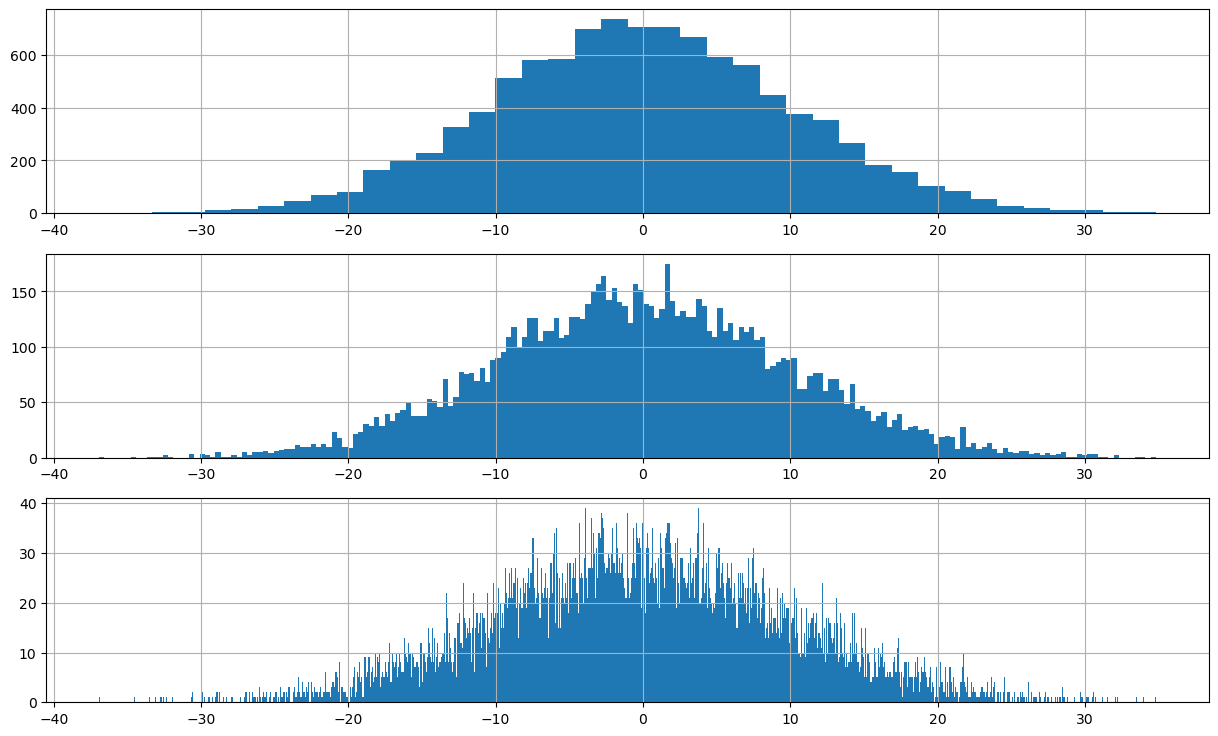

In [17]:
#Задание №2
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize = (15,9))
ax1 = fig.add_subplot(311) 
ax2 = fig.add_subplot(312) 
ax3 = fig.add_subplot(313) 

values = np.random.normal(0, 10, 10000)
 
ax1.hist(values, 40)
ax2.hist(values, 200)
ax3.hist(values, 1000)
ax1.grid() 
ax2.grid() 
ax3.grid() 

plt.show()

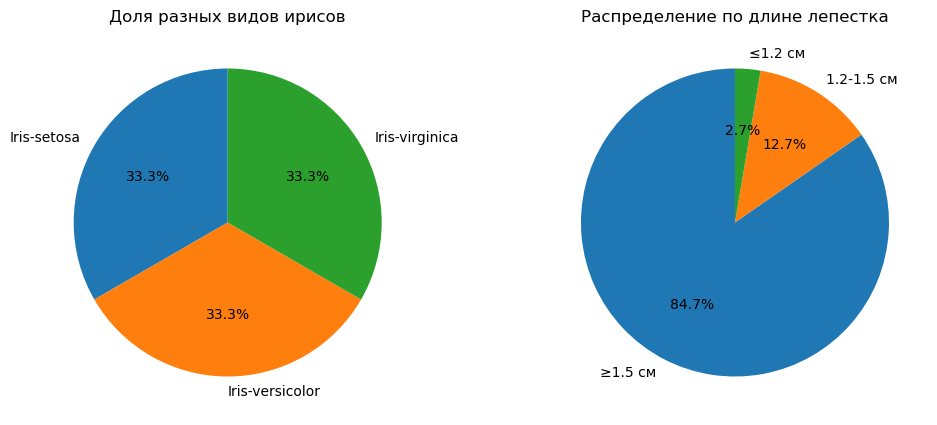

In [25]:
#Задание №3
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('/Users/yeakki/Desktop/iris_data.csv')


plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
species_counts = df['Species'].value_counts()
plt.pie(species_counts.values, labels=species_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Доля разных видов ирисов')

plt.subplot(1, 2, 2)

petal_length_categories = []
for length in df['PetalLengthCm']:
    if length <= 1.2:
        petal_length_categories.append('≤1.2 см')
    elif 1.2 < length < 1.5:
        petal_length_categories.append('1.2-1.5 см')
    else:
        petal_length_categories.append('≥1.5 см')

df['PetalLengthCategory'] = petal_length_categories
length_counts = df['PetalLengthCategory'].value_counts()

plt.pie(length_counts.values, labels=length_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Распределение по длине лепестка')

plt.show()

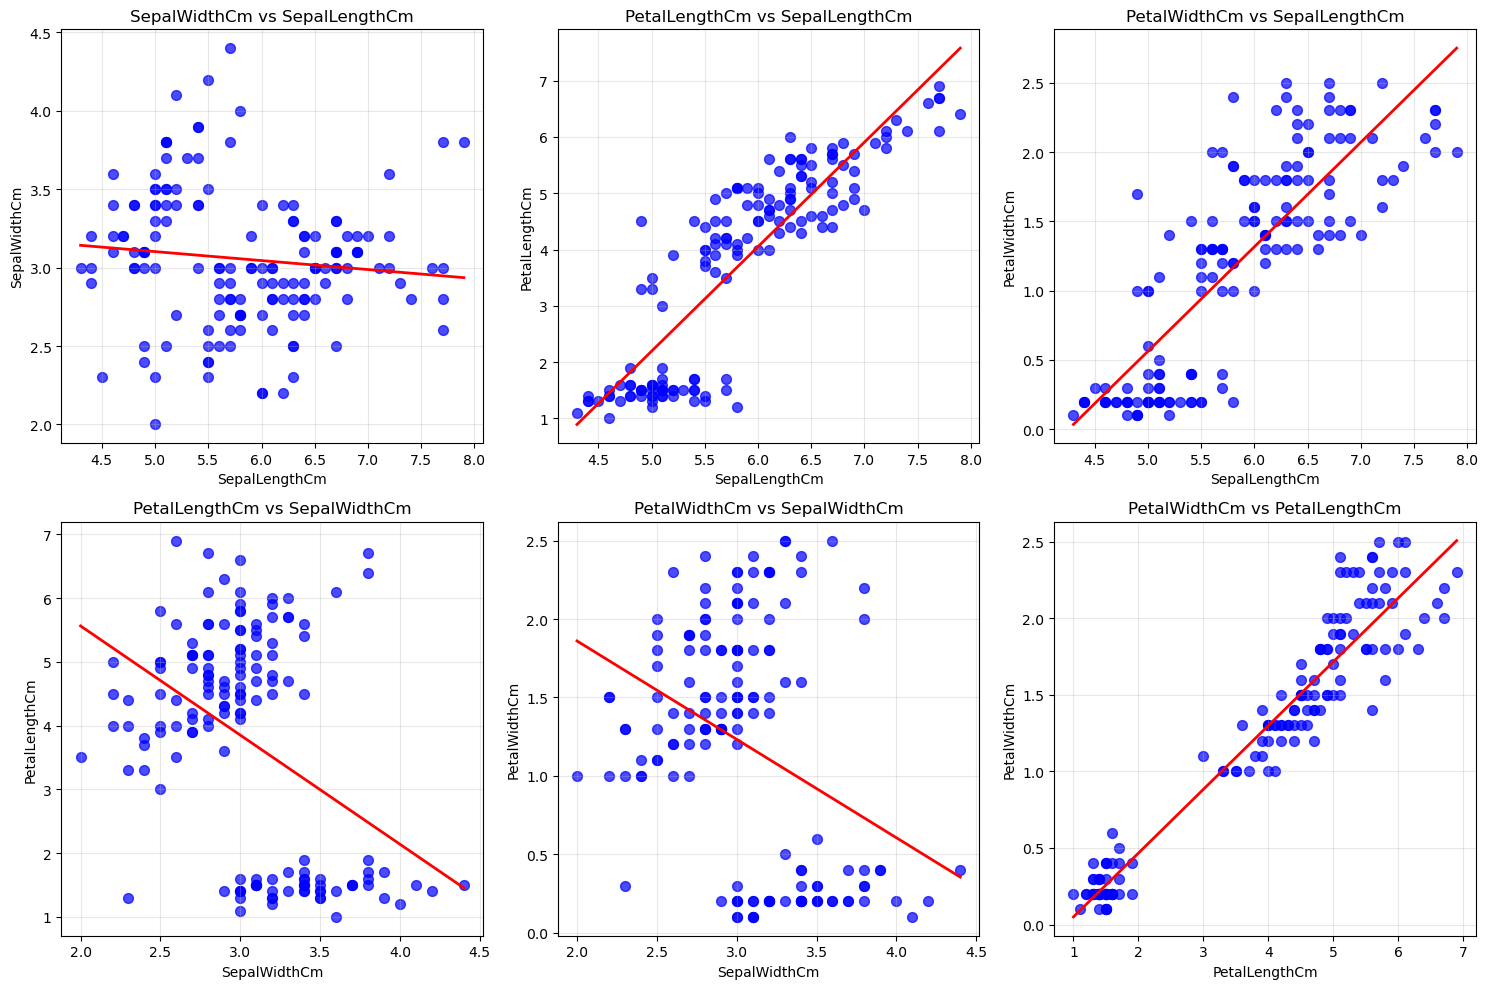

In [38]:
#Задание №4 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('/Users/yeakki/Desktop/iris_data.csv')

features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

combinations = []
for i in range(len(features)):
    for j in range(i + 1, len(features)):
        combinations.append((features[i], features[j]))

def linear_regression(x, y):
    n = len(x)
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    
    numerator = np.sum((x - x_mean) * (y - y_mean))
    denominator = np.sum((x - x_mean) ** 2)
    
    if denominator == 0:
        return 0, 0 
    
    slope = numerator / denominator
    intercept = y_mean - slope * x_mean

    y_pred = slope * x + intercept
    ss_res = np.sum((y - y_pred) ** 2)
    ss_tot = np.sum((y - y_mean) ** 2)
    
    if ss_tot == 0:
        r_squared = 1.0
    else:
        r_squared = 1 - (ss_res / ss_tot)
    return slope, intercept, r_squared

for idx, (x_feat, y_feat) in enumerate(combinations):
    x = df[x_feat].values
    y = df[y_feat].values

    axes[idx].scatter(x, y, alpha=0.7, color='blue', s=50)
    axes[idx].set_xlabel(x_feat)
    axes[idx].set_ylabel(y_feat)
    axes[idx].set_title(f'{y_feat} vs {x_feat}')
    axes[idx].grid(True, alpha=0.3)
    
    if len(x) > 1:
        slope, intercept, r_squared = linear_regression(x, y)
  
        x_line = np.linspace(np.min(x), np.max(x), 100)
        y_line = slope * x_line + intercept

        axes[idx].plot(x_line, y_line, color='red', linewidth=2, 
                      label=f'y = {slope:.2f}x + {intercept:.2f}\nR² = {r_squared:.2f}')

plt.tight_layout()
plt.show()

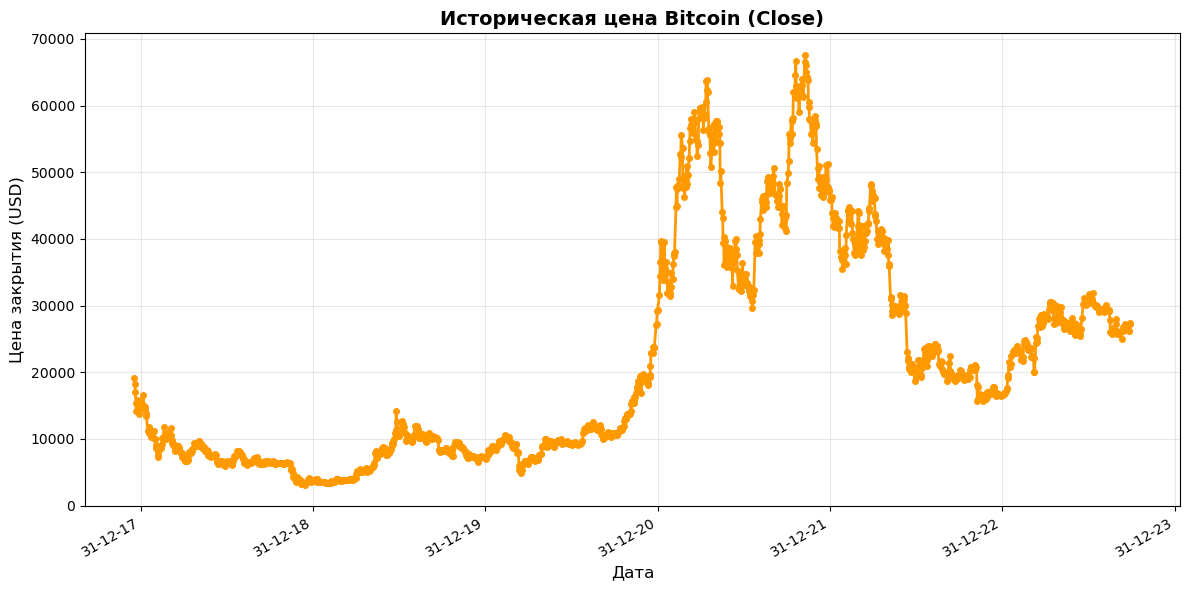

In [40]:
#Задание №5
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('/Users/yeakki/Downloads/BTC_data.csv')

df['time'] = df['time'].str.replace('T0200000', 'T02:00:00')
df['datetime'] = pd.to_datetime(df['time'])

df = df.sort_values('datetime')

plt.figure(figsize=(12, 6))
plt.plot(df['datetime'], df['close'], marker='o', linewidth=2, markersize=4, color='#FF9900')
plt.title('Историческая цена Bitcoin (Close)', fontsize=14, fontweight='bold')
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Цена закрытия (USD)', fontsize=12)
plt.grid(True, alpha=0.3)

plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%d-%m-%y'))
plt.gcf().autofmt_xdate()

plt.tight_layout()
plt.show()

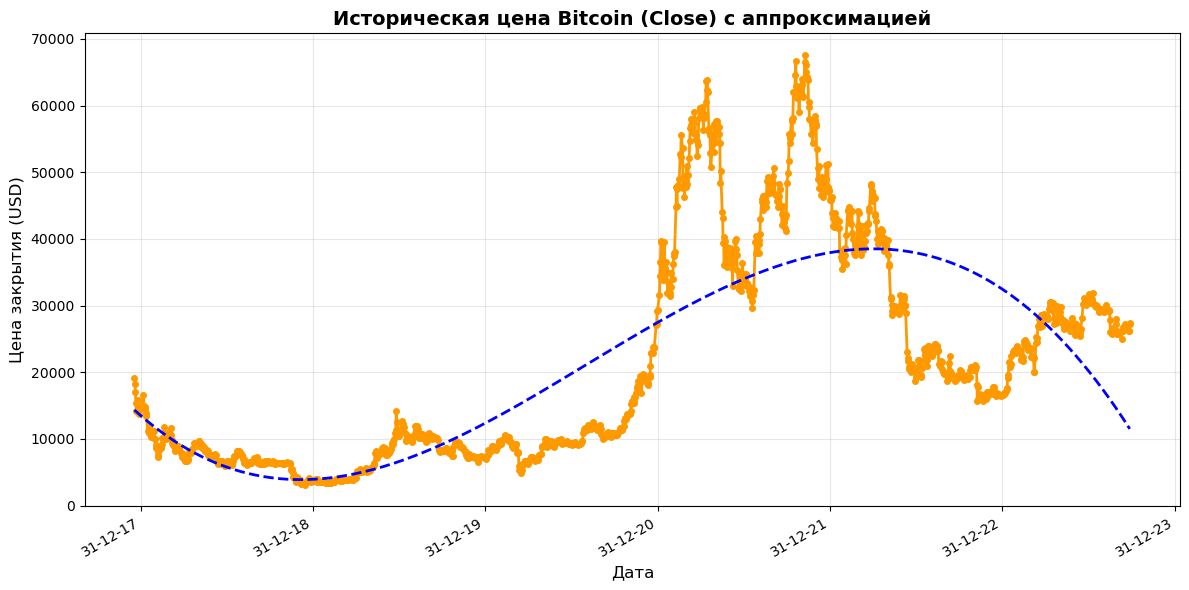

In [46]:
#Задание №6
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('/Users/yeakki/Downloads/BTC_data.csv')

df['time'] = df['time'].str.replace('T0200000', 'T02:00:00')
df['datetime'] = pd.to_datetime(df['time'])

df = df.sort_values('datetime')

df['days'] = (df['datetime'] - df['datetime'].min()).dt.days

x = df['days'].values
y = df['close'].values
z = np.polyfit(x, y, 3) 
p = np.poly1d(z)

x_smooth = np.linspace(x.min(), x.max(), 300)
y_smooth = p(x_smooth)

dates_smooth = df['datetime'].min() + pd.to_timedelta(x_smooth, unit='D')

plt.figure(figsize=(12, 6))

plt.plot(df['datetime'], df['close'], marker='o', linewidth=2, markersize=4, color='#FF9900', label='Фактическая цена')

plt.plot(dates_smooth, y_smooth, '--', linewidth=2, color='blue', label='Аппроксимация полиномом 3-й степени')

plt.title('Историческая цена Bitcoin (Close) с аппроксимацией', fontsize=14, fontweight='bold')
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Цена закрытия (USD)', fontsize=12)
plt.grid(True, alpha=0.3)


plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%d-%m-%y'))
plt.gcf().autofmt_xdate()

plt.tight_layout()
plt.show()

In [53]:
#Задание №7
import string

def count_words(filename):
    with open(filename, 'r') as file:
        text = file.read()
    
    translator = str.maketrans(string.punctuation, ' ' * len(string.punctuation))
    words = text.translate(translator).lower().split()
    
    word_count = {}
    
    for word in words:
        if word in word_count:
            word_count[word] += 1
        else:
            word_count[word] = 1 
    return word_count

def get_top_words(word_count, top_n=10):
    words_list = list(word_count.items())
    words_list.sort(key=lambda x: x[1], reverse=True)
    return words_list[:top_n]

word_count = count_words('/usr/share/licenses/python/LICENSE')

top_words = get_top_words(word_count, 10)

print("10 самых часто употребляемых слов:")
for i, (word, count) in enumerate(top_words, 1):
    print(f"{i:2}. {word:15} - {count:3} раз(а)")

FileNotFoundError: [Errno 2] No such file or directory: '/Users/yeakki/Desktop/share/licenses/python/LICENSE'

In [56]:
#Задание №8
list_a = [1, 3, 5, 7, 9, 11, 13]
list_b = [2, 3, 5, 7, 11, 13, 17]

set_a = set(list_a)
set_b = set(list_b)

print("Список A:", list_a)
print("Список B:", list_b)
print("Уникальные для A:", sorted(set_a - set_b))
print("Уникальные для B:", sorted(set_b - set_a))
print("Общие элементы:", sorted(set_a & set_b))
print("Все уникальные элементы:", sorted(set_a | set_b))

Список A: [1, 3, 5, 7, 9, 11, 13]
Список B: [2, 3, 5, 7, 11, 13, 17]
Уникальные для A: [1, 9]
Уникальные для B: [2, 17]
Общие элементы: [3, 5, 7, 11, 13]
Все уникальные элементы: [1, 2, 3, 5, 7, 9, 11, 13, 17]
